# Least Squares Approximation

We generate a random matrix $A$ and vector $b$, and find the least squares approximation to it (i.e., the vector $x$ such that $\lVert Ax-b \rVert_2$ is minimized).

In [2]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
dims = np.arange(100, 2000, step=50)

In [10]:
def ls(dims):
    times = []
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)

        start = perf_counter()

        q,r = np.linalg.qr(A)
        qt = np.transpose(q)
        c = qt @ b

        rinv = np.linalg.inv(r)
        xls = rinv @ c

        end = perf_counter()
        times.append(end - start)
       
    return times

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:34<00:00,  1.11it/s]


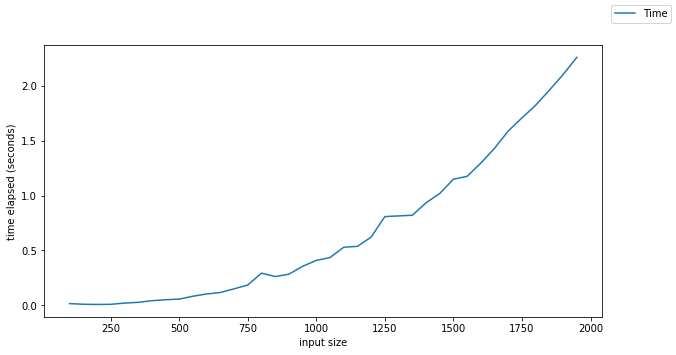

In [11]:
times = ls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

ax.plot(dims, times, label='Time')
ax.set_ylabel('time elapsed (seconds)')

fig.legend(loc='upper right')

In [12]:
def rls(dims):
    times = []
    iterations = 1000
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)
        def calc_norm(x):
            return np.linalg.norm(A@x - b)
        x_sol = np.random.randn(n,1)
        start = perf_counter()
        for i in range(iterations):
            x = np.random.randn(n,1)
            x_sol = min(x,x_sol,key = calc_norm)
        end = perf_counter()
        times.append(end - start)
    return times

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [01:41<00:00,  2.67s/it]


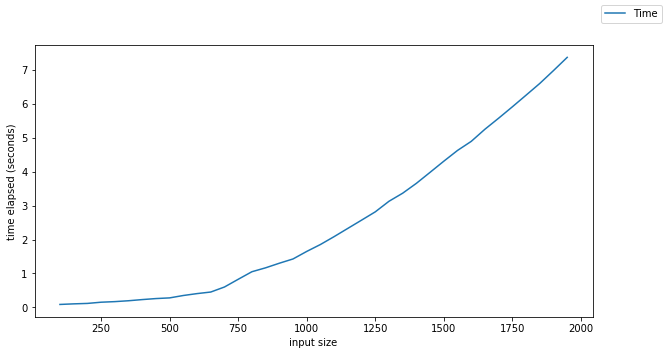

In [13]:
times2 = rls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

ax.plot(dims, times2, label='Time')
ax.set_ylabel('time elapsed (seconds)')

fig.legend(loc='upper right')